# Product summary for price increase

Project description: https://youtrack.geox.ws/issue/CRM-645

# Import Modules

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
from PIL import Image
from credentials import *
sys.path.append(project_path)
from urllib.request import urlopen
from Queries.product_overview import *
from ClassLibify.main import DataExtractor

# Options and Settings

In [2]:
%matplotlib inline
warnings.simplefilter("ignore")      
pd.set_option("expand_frame_repr", True)
np.set_printoptions(precision=4, suppress=True)

# Load Image

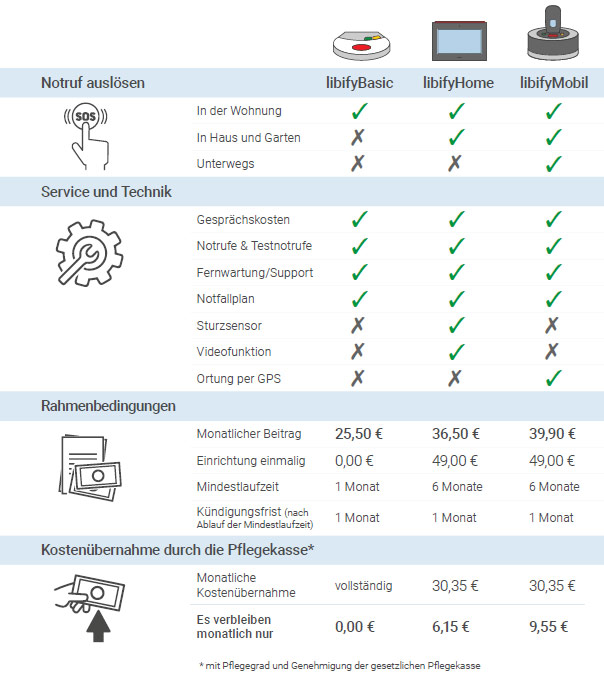

In [3]:
image_url = "https://somedi.eu/files/00-somedi/somedi_plus/hausnotruf/housenotruf-uebeblick.jpg"
Image.open(urlopen(image_url))

# Extract Data

In [4]:
df = DataExtractor().get_data_oro_db(query1)
df.head()

customer_name  account_id  contact_id  customer_id  subscription_id  \
0  Lieselotte Holz    712590.0   5121068.0      1375734           765506   
1     Barbara Bene    717048.0   5477876.0      1375738           765510   
2    Helga Tintrup    711012.0   5357282.0      1375764           765536   
3     Iris Windeln    717567.0   5482175.0      1375790          1607657   
4       Heinz Klim    710983.0   5358761.0      1375796           765568   

  subscription_status product coupon_code  invoice_amount invoice_date  
0              active   Mobil        None           33.53   2024-02-01  
1              active   Mobil     KK25-50           33.53   2024-02-01  
2              active   Mobil     KK25-50           33.53   2024-02-01  
3              active    Home     KK25-50           33.53   2024-02-01  
4              active   Mobil        None           33.53   2024-02-01

In [5]:
# filter only useful columns and rename columns
cols_to_use = ["customer_id", "customer_name", "account_id", "contact_id", "subscription_id"]

df = df[cols_to_use]
df.rename({"subscription_id": "Abonummer"}, axis=1, inplace=True)
df.head()

customer_id    customer_name  account_id  contact_id  Abonummer
0      1375734  Lieselotte Holz    712590.0   5121068.0     765506
1      1375738     Barbara Bene    717048.0   5477876.0     765510
2      1375764    Helga Tintrup    711012.0   5357282.0     765536
3      1375790     Iris Windeln    717567.0   5482175.0    1607657
4      1375796       Heinz Klim    710983.0   5358761.0     765568

In [6]:
df1 = pd.read_csv(os.path.join(os.getcwd(), "Datasets", "subscription_export.csv"),  sep=";")
df1.head()

Abonummer  Zusätzliche Abonummer  Abotitel Anrede           Vorname  \
0    1561192                    NaN       NaN    NaN  Rechnungsprüfung   
1     772962                    NaN       NaN    NaN             Erika   
2     765676                    NaN       NaN    mrs         Alexandra   
3     781564                    NaN       NaN     mr              René   
4     781566                    NaN       NaN     mr              René   

   Nachname  Firmenname                     Adresszeile Adresszeile 2  \
0       NaN  AOK Bayern      Landsberger Str. 150 – 152           NaN   
1    Elsner         NaN         Wildmeisterdamm 282/284           NaN   
2     Voigt         NaN  Elisabeth Mann Borgese Str. 20           NaN   
3  Maudrich    FastBill         TEST Wildunger Straße 6           NaN   
4  Maudrich    FastBill         TEST Wildunger Straße 6           NaN   

  Postleitzahl  ... Artikelnummer                      Produkttitel  \
0        80339  ...           202      Pflegehilfsmittel Hausnotruf   
1        12353  ...           203     Einmalige Einrichtungsgebühr    
2        81829  ...             1  LIBIFYfamily - Familie & Freunde   
3        60487  ...             1           Libify Notruflösung - S   
4        60487  ...             1           Libify Notruflösung - S   

                   Addons Betrag Nettobetrag Promocode  \
0                     NaN  30,35       25,50       NaN   
1                     NaN  49,00       41,18       NaN   
2  1 x Funkfinger RB4 Abo  29,89       25,12       NaN   
3                 1 x GC5  24,90       20,93       NaN   
4                     NaN  24,90       20,93       NaN   

  zusätzliche Kundenattribute Kündigungsnotiz  \
0                         NaN             NaN   
1                         NaN             NaN   
2                         NaN             NaN   
3                         NaN             NaN   
4                         NaN             NaN   

                                   zukünftiger Tarif Affiliate  
0                                                NaN       NaN  
1                                                NaN       NaN  
2  Nutzerin kommt ins betreute Wohnen. GEOCARE re...       NaN  
3               test wegen fehlermeldung im checkout       NaN  
4                  test wegen fehlermeldung checkout       NaN  

[5 rows x 28 columns]

In [7]:
df1["Status"].value_counts()

Storniert      46352
Active         32544
Geschlossen     5144
Testphase       1333
Inaktiv            4
Name: Status, dtype: int64

In [8]:
# filter only active and trial customers
df1 = df1.query("Status == 'Active' | Status == 'Testphase'").reset_index(drop=True)
df1.head()

Abonummer  Zusätzliche Abonummer  Abotitel Anrede    Vorname    Nachname  \
0    1617000                    NaN       NaN    NaN      Helga  Systermans   
1    1617004                    NaN       NaN     mr      Luigi       Urzia   
2    1617006                    NaN       NaN    mrs  Elisabeth  Kaldenbach   
3    1617008                    NaN       NaN    mrs      Petra      Röring   
4    1617010                    NaN       NaN    NaN      Erika     Kleiber   

  Firmenname          Adresszeile Adresszeile 2 Postleitzahl  ...  \
0        NaN    Eschweilerstr. 4b           NaN        50933  ...   
1        NaN  Saarbrücker Str. 14           NaN        66625  ...   
2        NaN     Vogelsangstr. 13           NaN        52159  ...   
3        NaN       Overhofstr. 10           NaN        45881  ...   
4        NaN    Berliner Allee 22           1/2        86153  ...   

  Artikelnummer                        Produkttitel  \
0          1900  libifyBasic - Pflegekassenzuschuss   
1          1900  libifyBasic - Pflegekassenzuschuss   
2          1900  libifyBasic - Pflegekassenzuschuss   
3          1901                         libifyBasic   
4          1900  libifyBasic - Pflegekassenzuschuss   

                              Addons Betrag Nettobetrag  \
0  1 x Postalischer Rechnungsversand   0,00        0,00   
1                                NaN   0,00        0,00   
2                                NaN   0,00        0,00   
3                                NaN  25,50       21,43   
4                                NaN   0,00        0,00   

                           Promocode  \
0  KK-Komplettübernahme(-100.0000 %)   
1  KK-Komplettübernahme(-100.0000 %)   
2  KK-Komplettübernahme(-100.0000 %)   
3                                NaN   
4  KK-Komplettübernahme(-100.0000 %)   

                         zusätzliche Kundenattribute Kündigungsnotiz  \
0  Affiliate:\r\nLIBIFYO\r\n\r\nlead:\r\nU5GEJ9PG...         LIBIFYO   
1  Affiliate:\r\nHHANL\r\n\r\nlead:\r\nHH-a0U7Q00...           HHANL   
2  Affiliate:\r\nAFHNRW\r\n\r\nlead:\r\nVP5DF4YQ7...          AFHNRW   
3  Affiliate:\r\nLIBIFYO\r\n\r\nlead:\r\nHS-15251...         LIBIFYO   
4  Affiliate:\r\n2XSALEIFK\r\n\r\nlead:\r\nHS-154...       2XSALEIFK   

  zukünftiger Tarif Affiliate  
0               NaN       NaN  
1               NaN       NaN  
2               NaN       NaN  
3               NaN       NaN  
4               NaN       NaN  

[5 rows x 28 columns]

# Merge DataFrames

In [9]:
df3 = df1.merge(df, on="Abonummer").reset_index(drop=True)
df3.head()

Abonummer  Zusätzliche Abonummer  Abotitel Anrede    Vorname    Nachname  \
0    1617000                    NaN       NaN    NaN      Helga  Systermans   
1    1617004                    NaN       NaN     mr      Luigi       Urzia   
2    1617006                    NaN       NaN    mrs  Elisabeth  Kaldenbach   
3    1617010                    NaN       NaN    NaN      Erika     Kleiber   
4    1617011                    NaN       NaN    mrs      Helga      Peters   

  Firmenname          Adresszeile Adresszeile 2 Postleitzahl  ... Nettobetrag  \
0        NaN    Eschweilerstr. 4b           NaN        50933  ...        0,00   
1        NaN  Saarbrücker Str. 14           NaN        66625  ...        0,00   
2        NaN     Vogelsangstr. 13           NaN        52159  ...        0,00   
3        NaN    Berliner Allee 22           1/2        86153  ...        0,00   
4        NaN        Türmchenweg 7           NaN        52080  ...       23,11   

                           Promocode  \
0  KK-Komplettübernahme(-100.0000 %)   
1  KK-Komplettübernahme(-100.0000 %)   
2  KK-Komplettübernahme(-100.0000 %)   
3  KK-Komplettübernahme(-100.0000 %)   
4                                NaN   

                         zusätzliche Kundenattribute Kündigungsnotiz  \
0  Affiliate:\r\nLIBIFYO\r\n\r\nlead:\r\nU5GEJ9PG...         LIBIFYO   
1  Affiliate:\r\nHHANL\r\n\r\nlead:\r\nHH-a0U7Q00...           HHANL   
2  Affiliate:\r\nAFHNRW\r\n\r\nlead:\r\nVP5DF4YQ7...          AFHNRW   
3  Affiliate:\r\n2XSALEIFK\r\n\r\nlead:\r\nHS-154...       2XSALEIFK   
4  Affiliate:\r\nAFHNRW\r\n\r\nlead:\r\n7NP3D3Z9G...          AFHNRW   

  zukünftiger Tarif Affiliate customer_id         customer_name account_id  \
0               NaN       NaN     2300096      Helga Systermans   991976.0   
1               NaN       NaN     2300099           Luigi Urzia   991576.0   
2               NaN       NaN     2300103  Elisabeth Kaldenbach   991980.0   
3               NaN       NaN     2300107         Erika Kleiber   991988.0   
4               NaN       NaN     2300108          Helga Peters   991993.0   

  contact_id  
0  6102362.0  
1  6101930.0  
2  6102367.0  
3  6102375.0  
4  6102385.0  

[5 rows x 32 columns]

# Write Output

In [10]:
with pd.ExcelWriter(os.path.join(task_output, "Product_Overview.xlsx")) as writer:
  df3.to_excel(writer, sheet_name="Product-Overview", index=False)